# Data Analysis with Python - Project 1


## Objectives


*   Explore features or charecteristics to predict price of car


<h3>What are the main characteristics that have the most impact on the car price?</h3>


<h2 id="import_data">1. Import Data from Module 2</h2>


Import libraries below:


In [26]:
#your code
import pandas as pd
import numpy as np

Load the data and store it in dataframe `df`:


In [27]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

load your data

In [28]:
df = pd.read_csv(filename)

view first few rows of your data

In [29]:
#df...
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


<h2 id="pattern_visualization">2. Analyzing Individual Feature Patterns Using Visualization</h2>


import matplotlib

In [30]:
import matplotlib as mpl

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important you first understand what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [31]:
# list the data types for each column
df.dtypes


symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "peak-rpm"? </b>

</div>


In [7]:
#your code
df['peak-rpm'].dtype

dtype('float64')

In [8]:
df['engine-size'].dtype

dtype('int64')

In [9]:
df['stroke'].dtype

dtype('float64')

In [10]:
df['price'].dtype

dtype('float64')

For example, we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":


In [12]:
#here is how
df[['stroke']].corr()

,stroke
stroke,1.0


The diagonal elements are always one; I will implement correlation more precisely Pearson correlation in-depth at the end of the project notebook.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</p>
    
__just select the columns and use .corr()__

In [13]:
# Write your code below and press Shift+Enter to execute 
#df[['col1', 'col2']].corr()

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()



,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


In [14]:
correlation = df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

print(correlation)

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.055390           0.001263    0.566936
stroke            -0.055390  1.000000           0.187923    0.098462
compression-ratio  0.001263  0.187923           1.000000   -0.214514
horsepower         0.566936  0.098462          -0.214514    1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, I use "regplot" which plots the scatterplot plus the fitted regression line for the data.</p>

<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "engine-size" and "price".


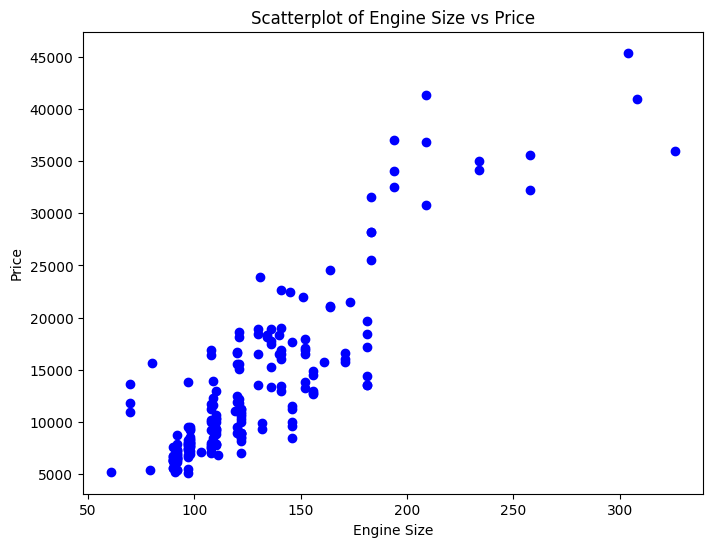

In [32]:
# Engine size as potential predictor variable of price, 
# use scatter plot to confirm this and add a regression line(line of best fit) 

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['engine-size'], df['price'], color='blue')

# Add labels (x and y) and title
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

# display the plot
plt.show()

In [34]:
x = df['engine-size']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([  166.86001569, -7963.33890628])

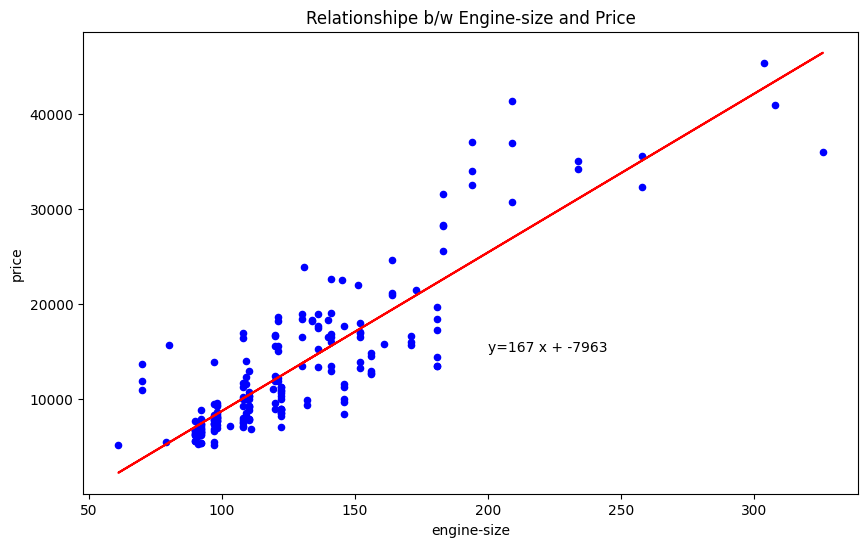

'NO R/S = 167 * engine-size + -7963'

In [35]:
df.plot(kind='scatter', x='engine-size', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w Engine-size and Price')
plt.xlabel('engine-size')
plt.ylabel('price')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(200, 15000))

plt.show()

# print out the line of best fit
'NO R/S = {0:.0f} * engine-size + {1:.0f}'.format(fit[0], fit[1]) 

<p>What did you find out on the scatter plot?? Tell me here.</p>


Positive Correlation: The points are rising from left to right (as engine size increases, price increases).
This shows that larger engine sizes tend to be linked with higher prices.

examine the correlation between 'engine-size' and 'price' and you see it's approximately 0.87.

In [42]:
#your code to confirm the correlation

correlation = df['engine-size'].corr(df['price'])
correlation



np.float64(0.8723351674455189)

In [40]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".


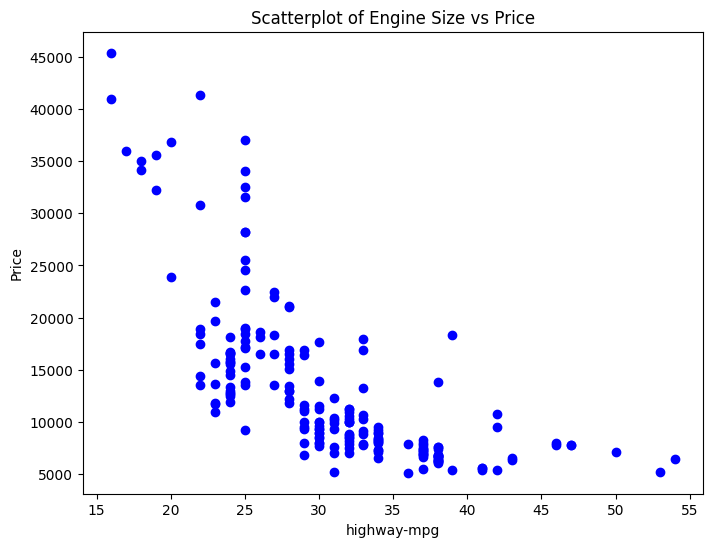

In [39]:
#your code here, add line of fit

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['highway-mpg'], df['price'], color='blue')

# Add labels (x and y) and title
plt.title('Scatterplot of Engine Size vs Price')
plt.xlabel('highway-mpg')
plt.ylabel('Price')

# display the plot
plt.show()




In [36]:
x = df['highway-mpg']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ -821.73337832, 38423.30585816])

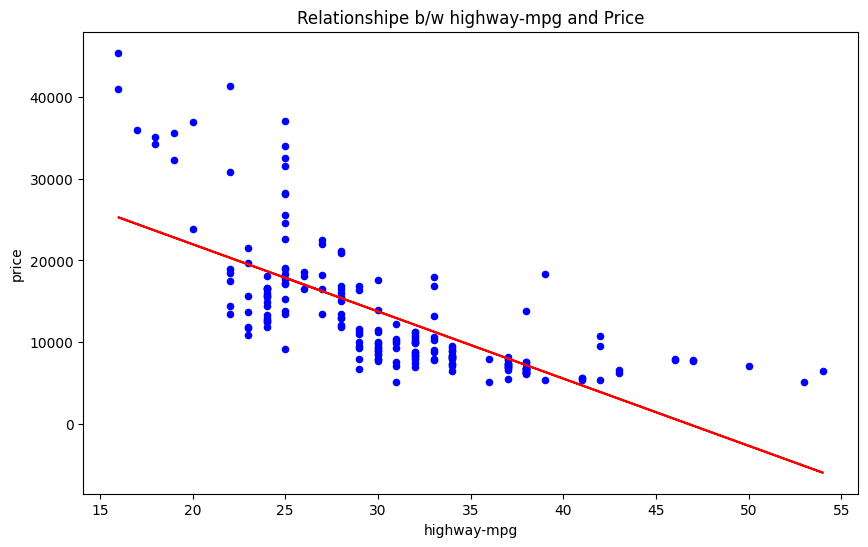

'NO R/S = -822 * highway-mpg + 38423'

In [38]:
df.plot(kind='scatter', x='highway-mpg', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w highway-mpg and Price')
plt.xlabel('highway-mpg')
plt.ylabel('price')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(200, 15000))

plt.show()

# print out the line of best fit
'NO R/S = {0:.0f} * highway-mpg + {1:.0f}'.format(fit[0], fit[1]) 

<p>Tell me what the relationship looks like here</p>


Negative Correlation: The points are sloping downward from left to right (as engine size increases, price decreases), it shows a negative correlation.

correlation between 'highway-mpg' and 'price' and see it's approximately -0.704. confirm this below below

In [43]:
##add your code here

correlation = df['highway-mpg'].corr(df['price'])
correlation

np.float64(-0.7046922650589534)

In [44]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>


Let's see if "peak-rpm" is a predictor variable of "price".

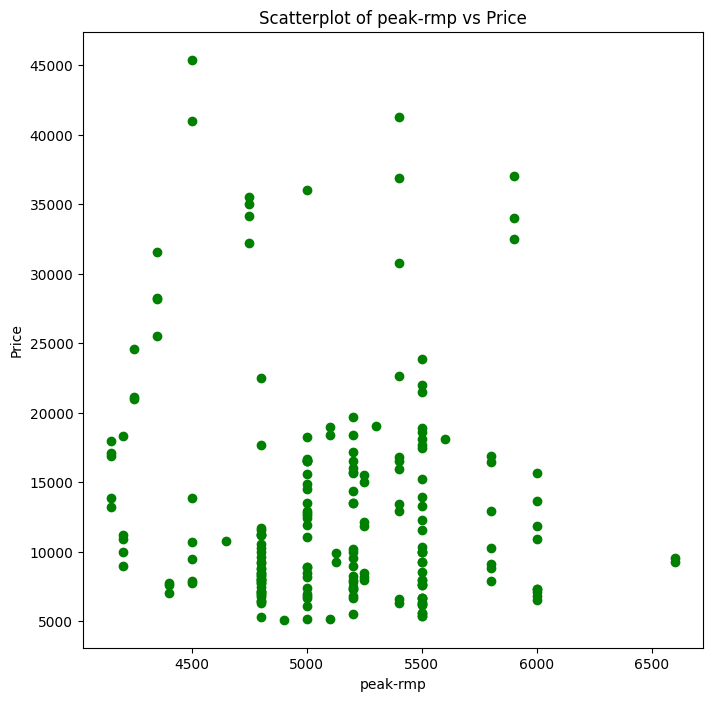

In [67]:
### add your code

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df['peak-rpm'], df['price'], color='green')

plt.title('Scatterplot of peak-rmp vs Price')
plt.xlabel('peak-rmp')
plt.ylabel('Price')

plt.show()

In [68]:
x = df['peak-rpm']      # year on x-axis
y = df['price']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([-1.68902902e+00,  2.18510147e+04])

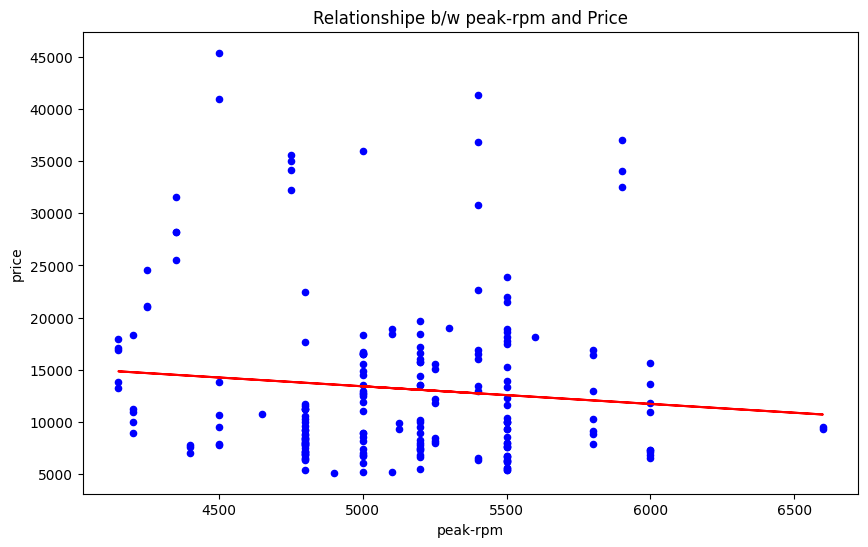

In [69]:
df.plot(kind='scatter', x='peak-rpm', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w peak-rpm and Price')
plt.xlabel('peak-rpm')
plt.ylabel('price')


plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(200, 15000))

plt.show()


<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616. Confirm this below


In [46]:
##add your code here

correlation = df['peak-rpm'].corr(df['price'])
correlation

np.float64(-0.1016158740758814)

In [47]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  3 a): </h1>

<p>Find the correlation  between x="stroke" and y="price".</p>

In [58]:
#Your code here

correlation = df['stroke'].corr(df['price'])
correlation

np.float64(0.0823098273897049)

In [59]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Given the correlation results between "price" and "stroke", expect a linear relationship?</p> 
<p>Verify results using matplotlib and best of line fit.</p>
</div>


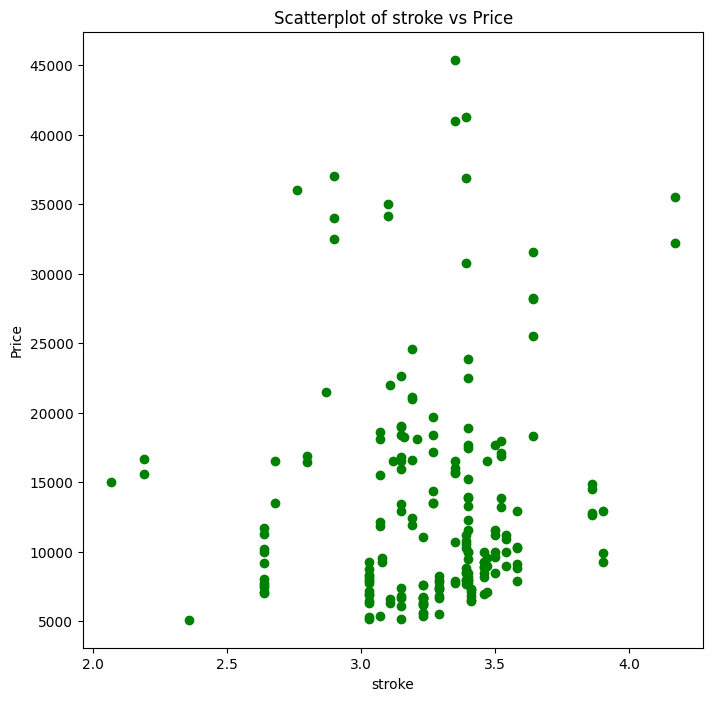

In [60]:
# Write your code below and press Shift+Enter to execute 

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df['stroke'], df['price'], color='green')

plt.title('Scatterplot of stroke vs Price')
plt.xlabel('stroke')
plt.ylabel('Price')

plt.show()

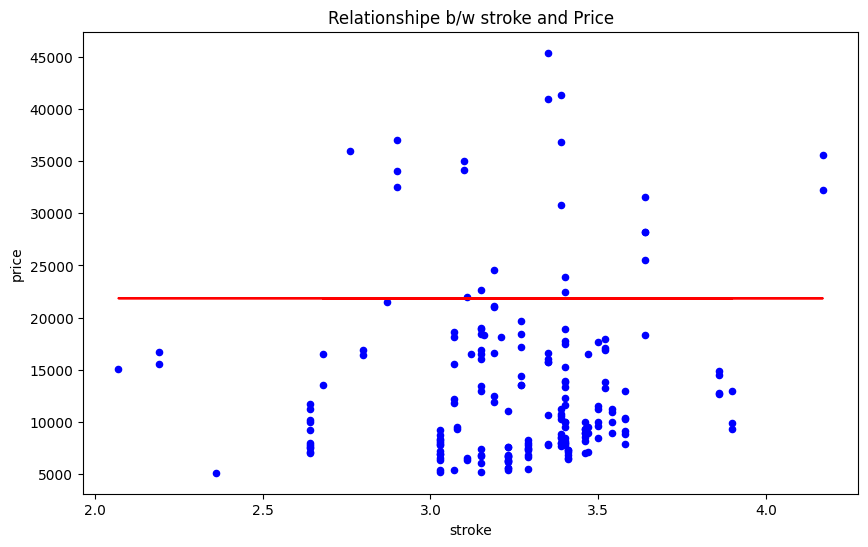

'NO R/S = -2 * stroke + 21851'

In [63]:
df.plot(kind='scatter', x='stroke', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w stroke and Price')
plt.xlabel('stroke')
plt.ylabel('price')


plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

'NO R/S = {0:.0f} * stroke + {1:.0f}'.format(fit[0], fit[1])

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots</p>


Let's look at the relationship between "body-style" and "price".


<Figure size 1000x600 with 0 Axes>

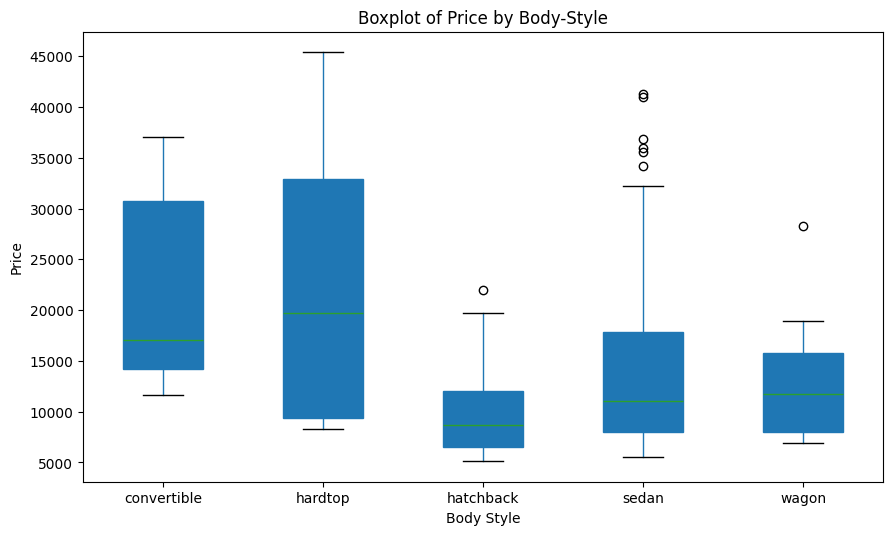

In [70]:
#your code here

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

df.boxplot(column='price', by='body-style', grid=False, figsize=(10,6), patch_artist=True)

plt.title('Boxplot of Price by Body-Style')
plt.suptitle('') 
plt.xlabel('Body Style')
plt.ylabel('Price')

plt.show()

What did you observe above?

What about engine-location and price? Check it below

<Figure size 1000x600 with 0 Axes>

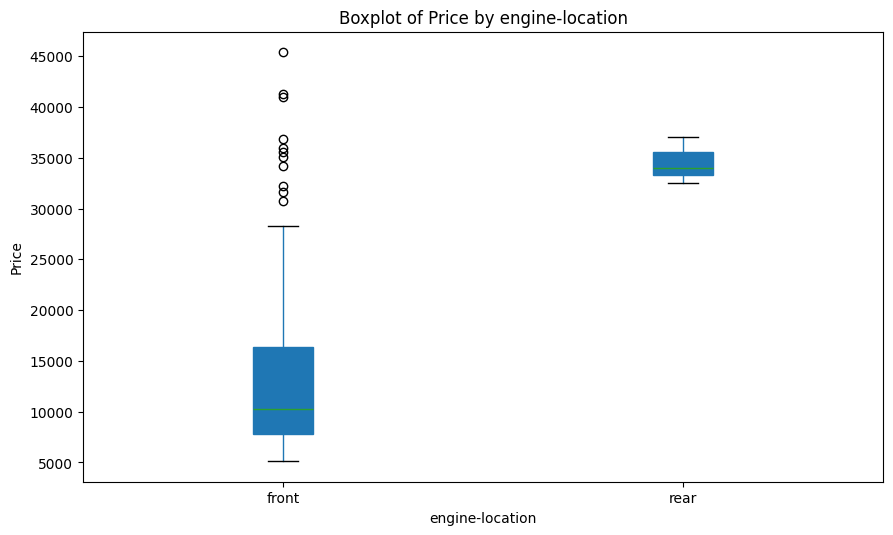

In [71]:
## your code

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

df.boxplot(column='price', by='engine-location', grid=False, figsize=(10,6), patch_artist=True)

plt.title('Boxplot of Price by engine-location')
plt.suptitle('') 
plt.xlabel('engine-location')
plt.ylabel('Price')

plt.show()

<p>What did you observe?</p>


Let's examine "drive-wheels" and "price".


<Figure size 800x800 with 0 Axes>

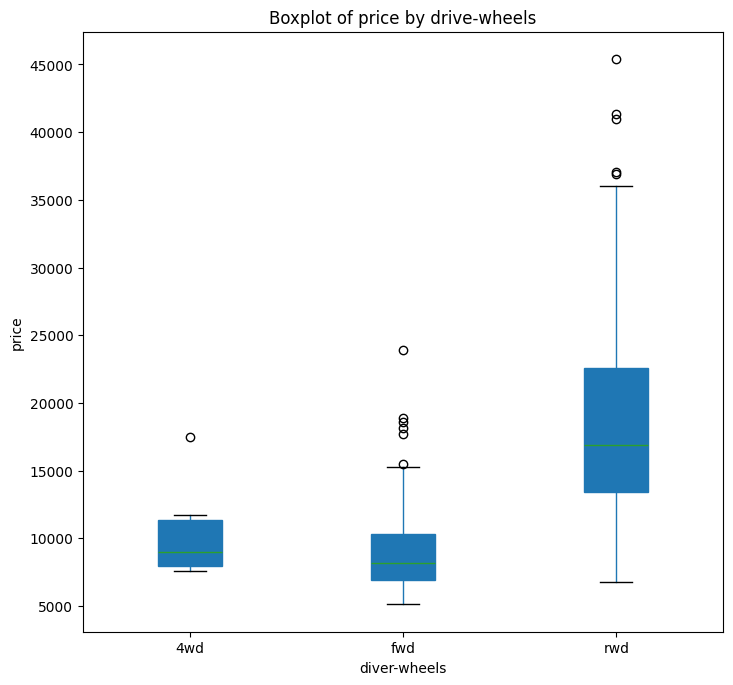

In [72]:
# drive-wheels
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

df.boxplot(column='price', by='drive-wheels' , grid=False, figsize=(8,8), patch_artist=True)

plt.title('Boxplot of price by drive-wheels')
plt.suptitle('')
plt.xlabel('diver-wheels')
plt.ylabel('price')

plt.show()

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>


<p>Let's first take a look at the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


Use describe to get all the statistical summary above


In [73]:
#your code

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' do this to return only object type columns and their statistics


In [74]:
#your code

df.describe(include='O')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Value Counts</h3>


<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. I apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, I only include one bracket <code>df['drive-wheels']</code>, not two brackets <code>df[['drive-wheels']]</code>.</p>

In [75]:
#your code
df['drive-wheels']

0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
196    rwd
197    rwd
198    rwd
199    rwd
200    rwd
Name: drive-wheels, Length: 201, dtype: object

I convert the series to a dataframe as follows:

In [77]:
#Uncomment and run this cell
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


<h2 id="basic_grouping">4. Basics of Grouping</h2>


<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>

<p>For example, I group by the variable "drive-wheels" and see that there are 3 different categories of drive wheels.</p>

In [78]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>I want to know, on average, which type of drive wheel is most valuable, I group "drive-wheels" and then average them.</p>

<p>I select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>

In [79]:
df_group_onee = df[['drive-wheels','price']]

We can then calculate the average price for each of the different categories of data.


In [80]:
# grouping results
df_group_one = df_group_onee.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>


In [81]:
# Write your code below and press Shift+Enter to execute 
df_group_two= df[['body-style','price']]

df_group_twos = df_group_two.groupby(['body-style'], as_index=False).mean().sort_values('price',ascending=False)
df_group_twos

,body-style,price
1,hardtop,22208.500000
0,convertible,21890.500000
3,sedan,14459.755319
4,wagon,12371.960000
2,hatchback,9957.441176


<h4>Variables: Drive Wheels and Body Style vs. Price</h4>
